In [1]:
from IPython.display import Image

# **Projekt na zajęcia Algorytmy Uczenia Maszynowego, prowadzący dr. inż Piotr Ciskowski**
# **Twórcy: Adam Kubiak i Piotr Gorzelnik**
# **Projekt: Rozpoznawanie podstaw języka migowego w czasie rzeczywistym**

W ramach projektu wykorzystaliśmy zbiór danych, złożony z zdjęć dłoni, która reprezentuje jedną z 24 liter języka migowego(W alfabecie znajduje się 26 liter jednak litera "J" oraz "Z" jest reprezentowana poprzez ruch dłonią co wykracza poza założenia projektu). 

#%%[markdown]
# ![title](ImagesNotebook\American-Sign-Language-alphabet-community-used-including-letters-from-A-to-Y-excluding.png)


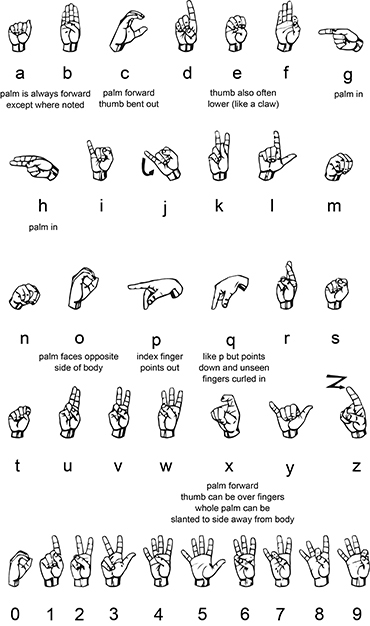

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy
import cv2
import os


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

#  **Importing Important Packages**

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Loading and Preprocessing the dataset**
The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST handwritten digit dataset but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. 


In [13]:
train_df=pd.read_csv('kaggle\sign_mnist_train.csv')
test_df=pd.read_csv('kaggle\sign_mnist_test.csv')


In [14]:
train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93
27454,23,179,180,180,180,182,181,182,183,182,...,108,132,170,194,214,203,197,205,209,215


In [15]:
df = train_df.iloc[:,0]
#print(col)
print(train_df.iloc[:,0].unique())

[ 3  6  2 13 16  8 22 18 10 20 17 19 21 23 24  1 12 11 15  4  0  5  7 14]


In [16]:
def addDataToSet(path_folder):
    i = 0
    path = os.path.join(path_folder)
    rows = len(os.listdir(path))
    finalImageList = np.zeros(shape=(rows,785))
    while i < len(os.listdir(path)):
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            img_array = np.mean(img_array,-1)
            #print(img.shape)
            img_array = scipy.ndimage.zoom(img_array,1/124)
            #plt.imshow(img_array, cmap='gray')
            img_array = img_array.reshape((1,784))
            img_array = np.insert(img_array, 0, int(9), axis=1) # label
            img_array = np.around(img_array,decimals=0)
            img_array = img_array.astype(int)
            finalImageList[i] = (img_array)
            i+=1
    return finalImageList

In [17]:
Datadirectory = "FAK"
df = pd.DataFrame(addDataToSet(Datadirectory), columns = ['label','pixel1','pixel2','pixel3','pixel4','pixel5','pixel6','pixel7','pixel8','pixel9','pixel10','pixel11','pixel12','pixel13','pixel14','pixel15','pixel16','pixel17','pixel18','pixel19','pixel20','pixel21','pixel22','pixel23','pixel24','pixel25','pixel26','pixel27','pixel28','pixel29','pixel30','pixel31','pixel32','pixel33','pixel34','pixel35','pixel36','pixel37','pixel38','pixel39','pixel40','pixel41','pixel42','pixel43','pixel44','pixel45','pixel46','pixel47','pixel48','pixel49','pixel50','pixel51','pixel52','pixel53','pixel54','pixel55','pixel56','pixel57','pixel58','pixel59','pixel60','pixel61','pixel62','pixel63','pixel64','pixel65','pixel66','pixel67','pixel68','pixel69','pixel70','pixel71','pixel72','pixel73','pixel74','pixel75','pixel76','pixel77','pixel78','pixel79','pixel80','pixel81','pixel82','pixel83','pixel84','pixel85','pixel86','pixel87','pixel88','pixel89','pixel90','pixel91','pixel92','pixel93','pixel94','pixel95','pixel96','pixel97','pixel98','pixel99','pixel100','pixel101','pixel102','pixel103','pixel104','pixel105','pixel106','pixel107','pixel108','pixel109','pixel110','pixel111','pixel112','pixel113','pixel114','pixel115','pixel116','pixel117','pixel118','pixel119','pixel120','pixel121','pixel122','pixel123','pixel124','pixel125','pixel126','pixel127','pixel128','pixel129','pixel130','pixel131','pixel132','pixel133','pixel134','pixel135','pixel136','pixel137','pixel138','pixel139','pixel140','pixel141','pixel142','pixel143','pixel144','pixel145','pixel146','pixel147','pixel148','pixel149','pixel150','pixel151','pixel152','pixel153','pixel154','pixel155','pixel156','pixel157','pixel158','pixel159','pixel160','pixel161','pixel162','pixel163','pixel164','pixel165','pixel166','pixel167','pixel168','pixel169','pixel170','pixel171','pixel172','pixel173','pixel174','pixel175','pixel176','pixel177','pixel178','pixel179','pixel180','pixel181','pixel182','pixel183','pixel184','pixel185','pixel186','pixel187','pixel188','pixel189','pixel190','pixel191','pixel192','pixel193','pixel194','pixel195','pixel196','pixel197','pixel198','pixel199','pixel200','pixel201','pixel202','pixel203','pixel204','pixel205','pixel206','pixel207','pixel208','pixel209','pixel210','pixel211','pixel212','pixel213','pixel214','pixel215','pixel216','pixel217','pixel218','pixel219','pixel220','pixel221','pixel222','pixel223','pixel224','pixel225','pixel226','pixel227','pixel228','pixel229','pixel230','pixel231','pixel232','pixel233','pixel234','pixel235','pixel236','pixel237','pixel238','pixel239','pixel240','pixel241','pixel242','pixel243','pixel244','pixel245','pixel246','pixel247','pixel248','pixel249','pixel250','pixel251','pixel252','pixel253','pixel254','pixel255','pixel256','pixel257','pixel258','pixel259','pixel260','pixel261','pixel262','pixel263','pixel264','pixel265','pixel266','pixel267','pixel268','pixel269','pixel270','pixel271','pixel272','pixel273','pixel274','pixel275','pixel276','pixel277','pixel278','pixel279','pixel280','pixel281','pixel282','pixel283','pixel284','pixel285','pixel286','pixel287','pixel288','pixel289','pixel290','pixel291','pixel292','pixel293','pixel294','pixel295','pixel296','pixel297','pixel298','pixel299','pixel300','pixel301','pixel302','pixel303','pixel304','pixel305','pixel306','pixel307','pixel308','pixel309','pixel310','pixel311','pixel312','pixel313','pixel314','pixel315','pixel316','pixel317','pixel318','pixel319','pixel320','pixel321','pixel322','pixel323','pixel324','pixel325','pixel326','pixel327','pixel328','pixel329','pixel330','pixel331','pixel332','pixel333','pixel334','pixel335','pixel336','pixel337','pixel338','pixel339','pixel340','pixel341','pixel342','pixel343','pixel344','pixel345','pixel346','pixel347','pixel348','pixel349','pixel350','pixel351','pixel352','pixel353','pixel354','pixel355','pixel356','pixel357','pixel358','pixel359','pixel360','pixel361','pixel362','pixel363','pixel364','pixel365','pixel366','pixel367','pixel368','pixel369','pixel370','pixel371','pixel372','pixel373','pixel374','pixel375','pixel376','pixel377','pixel378','pixel379','pixel380','pixel381','pixel382','pixel383','pixel384','pixel385','pixel386','pixel387','pixel388','pixel389','pixel390','pixel391','pixel392','pixel393','pixel394','pixel395','pixel396','pixel397','pixel398','pixel399','pixel400','pixel401','pixel402','pixel403','pixel404','pixel405','pixel406','pixel407','pixel408','pixel409','pixel410','pixel411','pixel412','pixel413','pixel414','pixel415','pixel416','pixel417','pixel418','pixel419','pixel420','pixel421','pixel422','pixel423','pixel424','pixel425','pixel426','pixel427','pixel428','pixel429','pixel430','pixel431','pixel432','pixel433','pixel434','pixel435','pixel436','pixel437','pixel438','pixel439','pixel440','pixel441','pixel442','pixel443','pixel444','pixel445','pixel446','pixel447','pixel448','pixel449','pixel450','pixel451','pixel452','pixel453','pixel454','pixel455','pixel456','pixel457','pixel458','pixel459','pixel460','pixel461','pixel462','pixel463','pixel464','pixel465','pixel466','pixel467','pixel468','pixel469','pixel470','pixel471','pixel472','pixel473','pixel474','pixel475','pixel476','pixel477','pixel478','pixel479','pixel480','pixel481','pixel482','pixel483','pixel484','pixel485','pixel486','pixel487','pixel488','pixel489','pixel490','pixel491','pixel492','pixel493','pixel494','pixel495','pixel496','pixel497','pixel498','pixel499','pixel500','pixel501','pixel502','pixel503','pixel504','pixel505','pixel506','pixel507','pixel508','pixel509','pixel510','pixel511','pixel512','pixel513','pixel514','pixel515','pixel516','pixel517','pixel518','pixel519','pixel520','pixel521','pixel522','pixel523','pixel524','pixel525','pixel526','pixel527','pixel528','pixel529','pixel530','pixel531','pixel532','pixel533','pixel534','pixel535','pixel536','pixel537','pixel538','pixel539','pixel540','pixel541','pixel542','pixel543','pixel544','pixel545','pixel546','pixel547','pixel548','pixel549','pixel550','pixel551','pixel552','pixel553','pixel554','pixel555','pixel556','pixel557','pixel558','pixel559','pixel560','pixel561','pixel562','pixel563','pixel564','pixel565','pixel566','pixel567','pixel568','pixel569','pixel570','pixel571','pixel572','pixel573','pixel574','pixel575','pixel576','pixel577','pixel578','pixel579','pixel580','pixel581','pixel582','pixel583','pixel584','pixel585','pixel586','pixel587','pixel588','pixel589','pixel590','pixel591','pixel592','pixel593','pixel594','pixel595','pixel596','pixel597','pixel598','pixel599','pixel600','pixel601','pixel602','pixel603','pixel604','pixel605','pixel606','pixel607','pixel608','pixel609','pixel610','pixel611','pixel612','pixel613','pixel614','pixel615','pixel616','pixel617','pixel618','pixel619','pixel620','pixel621','pixel622','pixel623','pixel624','pixel625','pixel626','pixel627','pixel628','pixel629','pixel630','pixel631','pixel632','pixel633','pixel634','pixel635','pixel636','pixel637','pixel638','pixel639','pixel640','pixel641','pixel642','pixel643','pixel644','pixel645','pixel646','pixel647','pixel648','pixel649','pixel650','pixel651','pixel652','pixel653','pixel654','pixel655','pixel656','pixel657','pixel658','pixel659','pixel660','pixel661','pixel662','pixel663','pixel664','pixel665','pixel666','pixel667','pixel668','pixel669','pixel670','pixel671','pixel672','pixel673','pixel674','pixel675','pixel676','pixel677','pixel678','pixel679','pixel680','pixel681','pixel682','pixel683','pixel684','pixel685','pixel686','pixel687','pixel688','pixel689','pixel690','pixel691','pixel692','pixel693','pixel694','pixel695','pixel696','pixel697','pixel698','pixel699','pixel700','pixel701','pixel702','pixel703','pixel704','pixel705','pixel706','pixel707','pixel708','pixel709','pixel710','pixel711','pixel712','pixel713','pixel714','pixel715','pixel716','pixel717','pixel718','pixel719','pixel720','pixel721','pixel722','pixel723','pixel724','pixel725','pixel726','pixel727','pixel728','pixel729','pixel730','pixel731','pixel732','pixel733','pixel734','pixel735','pixel736','pixel737','pixel738','pixel739','pixel740','pixel741','pixel742','pixel743','pixel744','pixel745','pixel746','pixel747','pixel748','pixel749','pixel750','pixel751','pixel752','pixel753','pixel754','pixel755','pixel756','pixel757','pixel758','pixel759','pixel760','pixel761','pixel762','pixel763','pixel764','pixel765','pixel766','pixel767','pixel768','pixel769','pixel770','pixel771','pixel772','pixel773','pixel774','pixel775','pixel776','pixel777','pixel778','pixel779','pixel780','pixel781','pixel782','pixel783','pixel784'
])
train_df = train_df.append(df)

C:\Users\Adam\AppData\Local\Temp\ipykernel_20220\1148061152.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(df)


In [18]:
Datadirectory = "FAK_TEST"
df = pd.DataFrame(addDataToSet(Datadirectory), columns = ['label','pixel1','pixel2','pixel3','pixel4','pixel5','pixel6','pixel7','pixel8','pixel9','pixel10','pixel11','pixel12','pixel13','pixel14','pixel15','pixel16','pixel17','pixel18','pixel19','pixel20','pixel21','pixel22','pixel23','pixel24','pixel25','pixel26','pixel27','pixel28','pixel29','pixel30','pixel31','pixel32','pixel33','pixel34','pixel35','pixel36','pixel37','pixel38','pixel39','pixel40','pixel41','pixel42','pixel43','pixel44','pixel45','pixel46','pixel47','pixel48','pixel49','pixel50','pixel51','pixel52','pixel53','pixel54','pixel55','pixel56','pixel57','pixel58','pixel59','pixel60','pixel61','pixel62','pixel63','pixel64','pixel65','pixel66','pixel67','pixel68','pixel69','pixel70','pixel71','pixel72','pixel73','pixel74','pixel75','pixel76','pixel77','pixel78','pixel79','pixel80','pixel81','pixel82','pixel83','pixel84','pixel85','pixel86','pixel87','pixel88','pixel89','pixel90','pixel91','pixel92','pixel93','pixel94','pixel95','pixel96','pixel97','pixel98','pixel99','pixel100','pixel101','pixel102','pixel103','pixel104','pixel105','pixel106','pixel107','pixel108','pixel109','pixel110','pixel111','pixel112','pixel113','pixel114','pixel115','pixel116','pixel117','pixel118','pixel119','pixel120','pixel121','pixel122','pixel123','pixel124','pixel125','pixel126','pixel127','pixel128','pixel129','pixel130','pixel131','pixel132','pixel133','pixel134','pixel135','pixel136','pixel137','pixel138','pixel139','pixel140','pixel141','pixel142','pixel143','pixel144','pixel145','pixel146','pixel147','pixel148','pixel149','pixel150','pixel151','pixel152','pixel153','pixel154','pixel155','pixel156','pixel157','pixel158','pixel159','pixel160','pixel161','pixel162','pixel163','pixel164','pixel165','pixel166','pixel167','pixel168','pixel169','pixel170','pixel171','pixel172','pixel173','pixel174','pixel175','pixel176','pixel177','pixel178','pixel179','pixel180','pixel181','pixel182','pixel183','pixel184','pixel185','pixel186','pixel187','pixel188','pixel189','pixel190','pixel191','pixel192','pixel193','pixel194','pixel195','pixel196','pixel197','pixel198','pixel199','pixel200','pixel201','pixel202','pixel203','pixel204','pixel205','pixel206','pixel207','pixel208','pixel209','pixel210','pixel211','pixel212','pixel213','pixel214','pixel215','pixel216','pixel217','pixel218','pixel219','pixel220','pixel221','pixel222','pixel223','pixel224','pixel225','pixel226','pixel227','pixel228','pixel229','pixel230','pixel231','pixel232','pixel233','pixel234','pixel235','pixel236','pixel237','pixel238','pixel239','pixel240','pixel241','pixel242','pixel243','pixel244','pixel245','pixel246','pixel247','pixel248','pixel249','pixel250','pixel251','pixel252','pixel253','pixel254','pixel255','pixel256','pixel257','pixel258','pixel259','pixel260','pixel261','pixel262','pixel263','pixel264','pixel265','pixel266','pixel267','pixel268','pixel269','pixel270','pixel271','pixel272','pixel273','pixel274','pixel275','pixel276','pixel277','pixel278','pixel279','pixel280','pixel281','pixel282','pixel283','pixel284','pixel285','pixel286','pixel287','pixel288','pixel289','pixel290','pixel291','pixel292','pixel293','pixel294','pixel295','pixel296','pixel297','pixel298','pixel299','pixel300','pixel301','pixel302','pixel303','pixel304','pixel305','pixel306','pixel307','pixel308','pixel309','pixel310','pixel311','pixel312','pixel313','pixel314','pixel315','pixel316','pixel317','pixel318','pixel319','pixel320','pixel321','pixel322','pixel323','pixel324','pixel325','pixel326','pixel327','pixel328','pixel329','pixel330','pixel331','pixel332','pixel333','pixel334','pixel335','pixel336','pixel337','pixel338','pixel339','pixel340','pixel341','pixel342','pixel343','pixel344','pixel345','pixel346','pixel347','pixel348','pixel349','pixel350','pixel351','pixel352','pixel353','pixel354','pixel355','pixel356','pixel357','pixel358','pixel359','pixel360','pixel361','pixel362','pixel363','pixel364','pixel365','pixel366','pixel367','pixel368','pixel369','pixel370','pixel371','pixel372','pixel373','pixel374','pixel375','pixel376','pixel377','pixel378','pixel379','pixel380','pixel381','pixel382','pixel383','pixel384','pixel385','pixel386','pixel387','pixel388','pixel389','pixel390','pixel391','pixel392','pixel393','pixel394','pixel395','pixel396','pixel397','pixel398','pixel399','pixel400','pixel401','pixel402','pixel403','pixel404','pixel405','pixel406','pixel407','pixel408','pixel409','pixel410','pixel411','pixel412','pixel413','pixel414','pixel415','pixel416','pixel417','pixel418','pixel419','pixel420','pixel421','pixel422','pixel423','pixel424','pixel425','pixel426','pixel427','pixel428','pixel429','pixel430','pixel431','pixel432','pixel433','pixel434','pixel435','pixel436','pixel437','pixel438','pixel439','pixel440','pixel441','pixel442','pixel443','pixel444','pixel445','pixel446','pixel447','pixel448','pixel449','pixel450','pixel451','pixel452','pixel453','pixel454','pixel455','pixel456','pixel457','pixel458','pixel459','pixel460','pixel461','pixel462','pixel463','pixel464','pixel465','pixel466','pixel467','pixel468','pixel469','pixel470','pixel471','pixel472','pixel473','pixel474','pixel475','pixel476','pixel477','pixel478','pixel479','pixel480','pixel481','pixel482','pixel483','pixel484','pixel485','pixel486','pixel487','pixel488','pixel489','pixel490','pixel491','pixel492','pixel493','pixel494','pixel495','pixel496','pixel497','pixel498','pixel499','pixel500','pixel501','pixel502','pixel503','pixel504','pixel505','pixel506','pixel507','pixel508','pixel509','pixel510','pixel511','pixel512','pixel513','pixel514','pixel515','pixel516','pixel517','pixel518','pixel519','pixel520','pixel521','pixel522','pixel523','pixel524','pixel525','pixel526','pixel527','pixel528','pixel529','pixel530','pixel531','pixel532','pixel533','pixel534','pixel535','pixel536','pixel537','pixel538','pixel539','pixel540','pixel541','pixel542','pixel543','pixel544','pixel545','pixel546','pixel547','pixel548','pixel549','pixel550','pixel551','pixel552','pixel553','pixel554','pixel555','pixel556','pixel557','pixel558','pixel559','pixel560','pixel561','pixel562','pixel563','pixel564','pixel565','pixel566','pixel567','pixel568','pixel569','pixel570','pixel571','pixel572','pixel573','pixel574','pixel575','pixel576','pixel577','pixel578','pixel579','pixel580','pixel581','pixel582','pixel583','pixel584','pixel585','pixel586','pixel587','pixel588','pixel589','pixel590','pixel591','pixel592','pixel593','pixel594','pixel595','pixel596','pixel597','pixel598','pixel599','pixel600','pixel601','pixel602','pixel603','pixel604','pixel605','pixel606','pixel607','pixel608','pixel609','pixel610','pixel611','pixel612','pixel613','pixel614','pixel615','pixel616','pixel617','pixel618','pixel619','pixel620','pixel621','pixel622','pixel623','pixel624','pixel625','pixel626','pixel627','pixel628','pixel629','pixel630','pixel631','pixel632','pixel633','pixel634','pixel635','pixel636','pixel637','pixel638','pixel639','pixel640','pixel641','pixel642','pixel643','pixel644','pixel645','pixel646','pixel647','pixel648','pixel649','pixel650','pixel651','pixel652','pixel653','pixel654','pixel655','pixel656','pixel657','pixel658','pixel659','pixel660','pixel661','pixel662','pixel663','pixel664','pixel665','pixel666','pixel667','pixel668','pixel669','pixel670','pixel671','pixel672','pixel673','pixel674','pixel675','pixel676','pixel677','pixel678','pixel679','pixel680','pixel681','pixel682','pixel683','pixel684','pixel685','pixel686','pixel687','pixel688','pixel689','pixel690','pixel691','pixel692','pixel693','pixel694','pixel695','pixel696','pixel697','pixel698','pixel699','pixel700','pixel701','pixel702','pixel703','pixel704','pixel705','pixel706','pixel707','pixel708','pixel709','pixel710','pixel711','pixel712','pixel713','pixel714','pixel715','pixel716','pixel717','pixel718','pixel719','pixel720','pixel721','pixel722','pixel723','pixel724','pixel725','pixel726','pixel727','pixel728','pixel729','pixel730','pixel731','pixel732','pixel733','pixel734','pixel735','pixel736','pixel737','pixel738','pixel739','pixel740','pixel741','pixel742','pixel743','pixel744','pixel745','pixel746','pixel747','pixel748','pixel749','pixel750','pixel751','pixel752','pixel753','pixel754','pixel755','pixel756','pixel757','pixel758','pixel759','pixel760','pixel761','pixel762','pixel763','pixel764','pixel765','pixel766','pixel767','pixel768','pixel769','pixel770','pixel771','pixel772','pixel773','pixel774','pixel775','pixel776','pixel777','pixel778','pixel779','pixel780','pixel781','pixel782','pixel783','pixel784'
])
test_df = test_df.append(df)

C:\Users\Adam\AppData\Local\Temp\ipykernel_20220\485829364.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(df)


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27559 entries, 0 to 103
Columns: 785 entries, label to pixel784
dtypes: float64(785)
memory usage: 165.3 MB


In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7211 entries, 0 to 38
Columns: 785 entries, label to pixel784
dtypes: float64(785)
memory usage: 43.2 MB


In [21]:
for col in test_df:
    test_df[col] = test_df[col].astype('int')
test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
34,9,163,165,160,154,153,147,148,151,146,...,58,61,57,55,68,74,89,94,97,90
35,9,158,166,156,155,153,150,150,148,150,...,63,64,64,84,84,86,86,93,91,94
36,9,164,163,165,159,155,149,154,151,149,...,65,66,74,81,94,100,104,106,102,105
37,9,164,166,163,160,154,159,155,156,158,...,75,73,72,71,84,100,102,109,115,111
38,9,154,157,157,155,153,151,157,152,151,...,94,81,73,71,71,90,102,111,114,107


In [22]:
df = train_df.iloc[:,0]
#print(col)
print(train_df.iloc[:,0].unique())

[ 3.  6.  2. 13. 16.  8. 22. 18. 10. 20. 17. 19. 21. 23. 24.  1. 12. 11.
 15.  4.  0.  5.  7. 14.  9.]


In [23]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27559.000000,27559.000000,27559.000000,27559.000000,27559.000000,27559.000000,27559.000000,27559.000000,27559.000000,27559.000000,...,27559.000000,27559.000000,27559.000000,27559.000000,27559.000000,27559.000000,27559.000000,27559.000000,27559.00000,27559.000000
mean,12.306288,145.416053,148.506368,151.246888,153.538155,156.189666,158.378533,160.433470,162.287420,163.902174,...,141.100258,147.473892,153.282086,159.049784,161.892993,162.667404,162.844515,161.915636,161.08832,159.750209
std,7.276634,41.295935,39.878723,38.991511,38.529139,37.047418,36.065376,34.959045,33.618007,32.606881,...,63.716939,65.479821,64.402084,63.701735,63.728069,63.427750,63.481940,63.259871,63.56091,64.356681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.000000,122.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,127.000000,128.00000,125.000000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,163.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.00000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,207.000000,207.000000,207.000000,205.000000,204.00000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000


In [24]:
train_df.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3.0,107.0,118.0,127.0,134.0,139.0,143.0,146.0,150.0,153.0,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6.0,155.0,157.0,156.0,156.0,156.0,157.0,156.0,158.0,158.0,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2.0,187.0,188.0,188.0,187.0,187.0,186.0,187.0,188.0,187.0,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2.0,211.0,211.0,212.0,212.0,211.0,210.0,211.0,210.0,210.0,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13.0,164.0,167.0,170.0,172.0,176.0,179.0,180.0,184.0,185.0,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0
5,16.0,161.0,168.0,172.0,173.0,178.0,184.0,189.0,193.0,196.0,...,76.0,74.0,68.0,62.0,53.0,55.0,48.0,238.0,255.0,255.0


The train_df dataset consit of 1st column representing labels 1 to 24.
The label is loaded in a seperate dataframe called 'train_label' and the 'label' column is dropped from the original training dataframe which now consist of only 784 pixel values for each image.

In [25]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107.0,118.0,127.0,134.0,139.0,143.0,146.0,150.0,153.0,156.0,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,155.0,157.0,156.0,156.0,156.0,157.0,156.0,158.0,158.0,157.0,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,187.0,188.0,188.0,187.0,187.0,186.0,187.0,188.0,187.0,186.0,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,211.0,211.0,212.0,212.0,211.0,210.0,211.0,210.0,210.0,211.0,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,164.0,167.0,170.0,172.0,176.0,179.0,180.0,184.0,185.0,186.0,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


Converting the dataframe to numpy array type to be used while training the CNN.
The array is converted from  1-D to 3-D which is the required input to the first layer of the CNN.
Similar preprocessing is done to the test dataframe.

In [26]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27559, 28, 28, 1)


In [27]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7211, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


**Converting the integer labels to binary form**

The label dataframe consist of single values from 1 to 24 for each individual picture. The CNN output layer will be of 24 nodes since it has 24 different labels as a multi label classifier. Hence each integer is encoded in a binary array of size 24 with the corresponding label being 1 and all other labels are 0. Such as if y=4 the the array is [0 0 0 1 0 0.....0].
The LabelBinarizer package from sklearn.preprocessing is used for that. The document link is https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

In [28]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)



In [3]:
for row in y_train:
    print(row)

NameError: name 'y_train' is not defined

: 

In [30]:
X_test=X_test.values.reshape(-1,28,28,1)

In [31]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27559, 28, 28, 1) (27559, 25) (7211, 28, 28, 1) (7211, 25)


**Augmenting the image dataset to generate new data**

ImageDataGenerator package from keras.preprocessing.image allows to add different distortions to image dataset by providing random rotation, zoom in/out , height or width scaling etc to images pixel by pixel.

Here is the package details https://keras.io/preprocessing/image/

The image dataset in also normalised here using the rescale parameter which divides each pixel by 255 such that the pixel values range between 0 to 1.

In [32]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

# **Visualization of the Dataset**

**Preview of the images in the training dataset**

Text(0.5, 1.0, 'label: 13  letter: M')

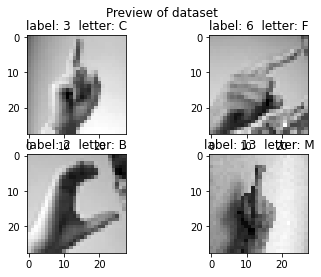

In [33]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[27530].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

**Frequency plot of the labels**

c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of each label')

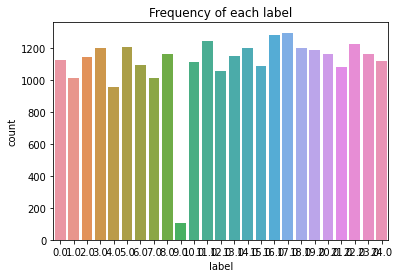

In [ ]:
sns.countplot(train_label)
plt.title("Frequency of each label")

# **Building the CNN Model**

The model consist of :
1. Three convolution layer each followed bt MaxPooling for better feature capture
2. A dense layer of 512 units
3. The output layer with 24 units for 24 different classes

**Convolution layers**

Conv layer 1 -- UNITS - 128  KERNEL SIZE - 5 * 5   STRIDE LENGTH - 1   ACTIVATION - ReLu

Conv layer 2 -- UNITS - 64   KERNEL SIZE - 3 * 3   STRIDE LENGTH - 1   ACTIVATION - ReLu

Conv layer 3 -- UNITS - 32   KERNEL SIZE - 2 * 2   STRIDE LENGTH - 1   ACTIVATION - ReLu




MaxPool layer 1 -- MAX POOL WINDOW - 3 * 3   STRIDE - 2

MaxPool layer 2 -- MAX POOL WINDOW - 2 * 2   STRIDE - 2

MaxPool layer 3 -- MAX POOL WINDOW - 2 * 2   STRIDE - 2

In [35]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

**Dense and output layers**

In [36]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=25,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Training the model**

In [38]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 30,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/30
138/138 [==============================] - 42s 296ms/step - loss: 2.9834 - accuracy: 0.1064 - val_loss: 2.2870 - val_accuracy: 0.2918
Epoch 2/30
138/138 [==============================] - 41s 297ms/step - loss: 2.2333 - accuracy: 0.2959 - val_loss: 1.5114 - val_accuracy: 0.5196
Epoch 3/30
138/138 [==============================] - 43s 312ms/step - loss: 1.6663 - accuracy: 0.4605 - val_loss: 1.0638 - val_accuracy: 0.6591
Epoch 4/30
138/138 [==============================] - 42s 306ms/step - loss: 1.3075 - accuracy: 0.5650 - val_loss: 0.9750 - val_accuracy: 0.6878
Epoch 5/30
138/138 [==============================] - 43s 312ms/step - loss: 1.0837 - accuracy: 0.6378 - val_loss: 0.7111 - val_accuracy: 0.7410
Epoch 6/30
138/138 [==============================] - 44s 315ms/step - loss: 0.9143 - accuracy: 0.6957 - val_loss: 0.5533 - val_accuracy: 0.7864
Epoch 7/30
138/138 [==============================] - 43s 311ms/step - loss: 0.7955 - accuracy: 0.7328 - val_loss: 0.4428 - val_ac

In [41]:
model.save("Model_25E.h5")

In [42]:
model = tf.keras.models.load_model("Modelxd.h5")

**Evaluating the model**

In [40]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

226/226 [==============================] - 3s 15ms/step - loss: 0.0448 - accuracy: 0.9889


In [89]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 42.22715198993683%


In [ ]:
from keras.models import load_model

model = load_model('Modelxd.h5')
prediction = model.predict(X_train)
print(prediction)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.2679929e-04 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]]


In [ ]:
# MURZYN
#!cd Tensorflow && git clone https://github.com/tensorflow/models

In [1]:
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'FAK',
                    10: 'K',
                    11: 'L',
                    12: 'M',
                    13: 'N',
                    14: 'O',
                    15: 'P',
                    16: 'Q',
                    17: 'R',
                    18: 'S',
                    19: 'T',
                    20: 'U',
                    21: 'V',
                    22: 'W',
                    23: 'X',
                    24: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

def keras_predict(model, image):
	pred_probab = model.predict(image)[0]
	pred_class = list(pred_probab).index(max(pred_probab))
	return max(pred_probab), pred_class

In [2]:
# OD MURZYNA - odpalenie w czasie rzeczywistym z kamerką
import cv2
import numpy as np
from PIL import Image
from keras import models
import time
from time import time
import tensorflow as tf  
cap = cv2.VideoCapture(0)

model = models.load_model('Model_25E.h5')


while True:

    ret, frame = cap.read()
    
    ##############################
    frame=cv2.flip(frame, 1)

    #define region of interest
    roi = frame[100:400, 320:620]
    #cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    roi = roi.reshape(1,28,28,1) 
    roi = roi/255
    pred_probab, pred_class = keras_predict(model,roi)
     
    print(pred_probab*100)
        #print(X_train[np.argmax(Y_proba)])
        
    #wynik = np.argmax(Y_proba)
    litera = getLetter(pred_class)
    cv2.putText(copy, litera, (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)    
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        



1/1 [==============================] - 0s 103ms/step
63.19630742073059
1/1 [==============================] - 0s 18ms/step
63.2388174533844
1/1 [==============================] - 0s 14ms/step
63.60004544258118
1/1 [==============================] - 0s 12ms/step
64.3066942691803
1/1 [==============================] - 0s 15ms/step
63.34967613220215
1/1 [==============================] - 0s 13ms/step
62.21523880958557
1/1 [==============================] - 0s 15ms/step
55.994713306427
1/1 [==============================] - 0s 14ms/step
56.915634870529175
1/1 [==============================] - 0s 13ms/step
56.96299076080322
1/1 [==============================] - 0s 13ms/step
56.382280588150024
1/1 [==============================] - 0s 16ms/step
56.61282539367676
1/1 [==============================] - 0s 14ms/step
55.25093674659729
1/1 [==============================] - 0s 15ms/step
56.249022483825684
1/1 [==============================] - 0s 15ms/step
55.11464476585388
1/1 [===============

KeyboardInterrupt: 

In [4]:
cap.release()
cv2.destroyAllWindows() 

In [ ]:
# ZE STACKOVERFLOW - odpalenie w czasie rzeczywistym z kamerką
from PIL import Image
from keras.models import load_model
import keras.models
video = cv2.VideoCapture(0)

model = load_model('Modelxd.h5')
while True:
        _, frame = video.read()

        #Convert the captured frame into RGB
        im = Image.fromarray(frame)

        #Resizing into dimensions you used while training
        im = im.resize((28,28))
        img_array = np.array(im)

        #Expand dimensions to match the 4D Tensor shape.
        img_array = np.expand_dims(img_array, axis=0)

        #Calling the predict function using keras
        prediction = model.predict(img_array)#[0][0]
        print(prediction)

        cv2.imshow("Prediction", frame)
        key=cv2.waitKey(1)
        if key == ord('q'):
                break
video.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
from PIL import Image
from keras import models
import time

model = models.load_model('Model_25E.h5')
video = cv2.VideoCapture(0)


font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255) # białe tło prostokąta
img = np.zeros((500, 500)) # czarna bitmapa

text = "test"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

def video_overlay(status):
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        #cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)

alfabet = ["A","B","C","D","E","F","G","H","I","FAK","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]
        
while True:
        _, frame = video.read()
        font_scale = 1.5
        font = cv2.FONT_HERSHEY_PLAIN
    

        #Convert the captured frame into RGB
        im = Image.fromarray(frame, 'RGB') # L - 8bit black/white. https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

        #Resizing into 128x128 because we trained the model with this image size.
        im = im.resize((28, 28))
        img_array = np.array(im)
        img_array = np.mean(img_array,-1)
        #Our keras model used a 4D tensor, (images x height x width x channel)
        #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)
        
        
        #Calling the predict method on model to predict 'me' on the image
        #prediction = int(model.predict(img_array)[0][0])
        #img_array = np.dot(img_array[...,:3], [0.299, 0.587, 0.114]) # obraz z kamery do szarości
        img_array = img_array.reshape(-1,28,28,1)
        #print(img_array.shape)
        
        Y_proba = model.predict(img_array)
        #print(X_train[np.argmax(Y_proba)])
        
        wynik = np.argmax(Y_proba)
        litera = alfabet[wynik]
        #video_overlay(str(wynik))
        video_overlay(str(litera))

        cv2.imshow("Sign language to text", frame)
        key=cv2.waitKey(1)
        if key == ord('q'):
                break
                
        
        time.sleep(0.1)
video.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 482ms/step


KeyboardInterrupt: 

In [4]:
my_str = "label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pixel457,pixel458,pixel459,pixel460,pixel461,pixel462,pixel463,pixel464,pixel465,pixel466,pixel467,pixel468,pixel469,pixel470,pixel471,pixel472,pixel473,pixel474,pixel475,pixel476,pixel477,pixel478,pixel479,pixel480,pixel481,pixel482,pixel483,pixel484,pixel485,pixel486,pixel487,pixel488,pixel489,pixel490,pixel491,pixel492,pixel493,pixel494,pixel495,pixel496,pixel497,pixel498,pixel499,pixel500,pixel501,pixel502,pixel503,pixel504,pixel505,pixel506,pixel507,pixel508,pixel509,pixel510,pixel511,pixel512,pixel513,pixel514,pixel515,pixel516,pixel517,pixel518,pixel519,pixel520,pixel521,pixel522,pixel523,pixel524,pixel525,pixel526,pixel527,pixel528,pixel529,pixel530,pixel531,pixel532,pixel533,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784"
substr = ","
inserttxt = "\',\'"

my_str.replace(substr, inserttxt)

"label','pixel1','pixel2','pixel3','pixel4','pixel5','pixel6','pixel7','pixel8','pixel9','pixel10','pixel11','pixel12','pixel13','pixel14','pixel15','pixel16','pixel17','pixel18','pixel19','pixel20','pixel21','pixel22','pixel23','pixel24','pixel25','pixel26','pixel27','pixel28','pixel29','pixel30','pixel31','pixel32','pixel33','pixel34','pixel35','pixel36','pixel37','pixel38','pixel39','pixel40','pixel41','pixel42','pixel43','pixel44','pixel45','pixel46','pixel47','pixel48','pixel49','pixel50','pixel51','pixel52','pixel53','pixel54','pixel55','pixel56','pixel57','pixel58','pixel59','pixel60','pixel61','pixel62','pixel63','pixel64','pixel65','pixel66','pixel67','pixel68','pixel69','pixel70','pixel71','pixel72','pixel73','pixel74','pixel75','pixel76','pixel77','pixel78','pixel79','pixel80','pixel81','pixel82','pixel83','pixel84','pixel85','pixel86','pixel87','pixel88','pixel89','pixel90','pixel91','pixel92','pixel93','pixel94','pixel95','pixel96','pixel97','pixel98','pixel99','pixel100',

In [13]:
#
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = scipy.ndimage.zoom(img,1/2)

finalImageList = []
#numpList = np.resize(img,(1,784))

Datadirectory = "FAK"

path = os.path.join(Datadirectory)

for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    img_array = np.mean(img_array,-1)
    img_array = scipy.ndimage.zoom(img_array,1/124)
    #plt.imshow(img_array, cmap='gray')
    img_array = cv2.resize(img_array, (784, 1))
    img_array = np.insert(img_array, 0, 40, axis=1)
    finalImageList.append(img_array)



df = pd.DataFrame(finalImageList, columns = ['label','pixel1','pixel2','pixel3','pixel4','pixel5','pixel6','pixel7','pixel8','pixel9','pixel10','pixel11','pixel12','pixel13','pixel14','pixel15','pixel16','pixel17','pixel18','pixel19','pixel20','pixel21','pixel22','pixel23','pixel24','pixel25','pixel26','pixel27','pixel28','pixel29','pixel30','pixel31','pixel32','pixel33','pixel34','pixel35','pixel36','pixel37','pixel38','pixel39','pixel40','pixel41','pixel42','pixel43','pixel44','pixel45','pixel46','pixel47','pixel48','pixel49','pixel50','pixel51','pixel52','pixel53','pixel54','pixel55','pixel56','pixel57','pixel58','pixel59','pixel60','pixel61','pixel62','pixel63','pixel64','pixel65','pixel66','pixel67','pixel68','pixel69','pixel70','pixel71','pixel72','pixel73','pixel74','pixel75','pixel76','pixel77','pixel78','pixel79','pixel80','pixel81','pixel82','pixel83','pixel84','pixel85','pixel86','pixel87','pixel88','pixel89','pixel90','pixel91','pixel92','pixel93','pixel94','pixel95','pixel96','pixel97','pixel98','pixel99','pixel100','pixel101','pixel102','pixel103','pixel104','pixel105','pixel106','pixel107','pixel108','pixel109','pixel110','pixel111','pixel112','pixel113','pixel114','pixel115','pixel116','pixel117','pixel118','pixel119','pixel120','pixel121','pixel122','pixel123','pixel124','pixel125','pixel126','pixel127','pixel128','pixel129','pixel130','pixel131','pixel132','pixel133','pixel134','pixel135','pixel136','pixel137','pixel138','pixel139','pixel140','pixel141','pixel142','pixel143','pixel144','pixel145','pixel146','pixel147','pixel148','pixel149','pixel150','pixel151','pixel152','pixel153','pixel154','pixel155','pixel156','pixel157','pixel158','pixel159','pixel160','pixel161','pixel162','pixel163','pixel164','pixel165','pixel166','pixel167','pixel168','pixel169','pixel170','pixel171','pixel172','pixel173','pixel174','pixel175','pixel176','pixel177','pixel178','pixel179','pixel180','pixel181','pixel182','pixel183','pixel184','pixel185','pixel186','pixel187','pixel188','pixel189','pixel190','pixel191','pixel192','pixel193','pixel194','pixel195','pixel196','pixel197','pixel198','pixel199','pixel200','pixel201','pixel202','pixel203','pixel204','pixel205','pixel206','pixel207','pixel208','pixel209','pixel210','pixel211','pixel212','pixel213','pixel214','pixel215','pixel216','pixel217','pixel218','pixel219','pixel220','pixel221','pixel222','pixel223','pixel224','pixel225','pixel226','pixel227','pixel228','pixel229','pixel230','pixel231','pixel232','pixel233','pixel234','pixel235','pixel236','pixel237','pixel238','pixel239','pixel240','pixel241','pixel242','pixel243','pixel244','pixel245','pixel246','pixel247','pixel248','pixel249','pixel250','pixel251','pixel252','pixel253','pixel254','pixel255','pixel256','pixel257','pixel258','pixel259','pixel260','pixel261','pixel262','pixel263','pixel264','pixel265','pixel266','pixel267','pixel268','pixel269','pixel270','pixel271','pixel272','pixel273','pixel274','pixel275','pixel276','pixel277','pixel278','pixel279','pixel280','pixel281','pixel282','pixel283','pixel284','pixel285','pixel286','pixel287','pixel288','pixel289','pixel290','pixel291','pixel292','pixel293','pixel294','pixel295','pixel296','pixel297','pixel298','pixel299','pixel300','pixel301','pixel302','pixel303','pixel304','pixel305','pixel306','pixel307','pixel308','pixel309','pixel310','pixel311','pixel312','pixel313','pixel314','pixel315','pixel316','pixel317','pixel318','pixel319','pixel320','pixel321','pixel322','pixel323','pixel324','pixel325','pixel326','pixel327','pixel328','pixel329','pixel330','pixel331','pixel332','pixel333','pixel334','pixel335','pixel336','pixel337','pixel338','pixel339','pixel340','pixel341','pixel342','pixel343','pixel344','pixel345','pixel346','pixel347','pixel348','pixel349','pixel350','pixel351','pixel352','pixel353','pixel354','pixel355','pixel356','pixel357','pixel358','pixel359','pixel360','pixel361','pixel362','pixel363','pixel364','pixel365','pixel366','pixel367','pixel368','pixel369','pixel370','pixel371','pixel372','pixel373','pixel374','pixel375','pixel376','pixel377','pixel378','pixel379','pixel380','pixel381','pixel382','pixel383','pixel384','pixel385','pixel386','pixel387','pixel388','pixel389','pixel390','pixel391','pixel392','pixel393','pixel394','pixel395','pixel396','pixel397','pixel398','pixel399','pixel400','pixel401','pixel402','pixel403','pixel404','pixel405','pixel406','pixel407','pixel408','pixel409','pixel410','pixel411','pixel412','pixel413','pixel414','pixel415','pixel416','pixel417','pixel418','pixel419','pixel420','pixel421','pixel422','pixel423','pixel424','pixel425','pixel426','pixel427','pixel428','pixel429','pixel430','pixel431','pixel432','pixel433','pixel434','pixel435','pixel436','pixel437','pixel438','pixel439','pixel440','pixel441','pixel442','pixel443','pixel444','pixel445','pixel446','pixel447','pixel448','pixel449','pixel450','pixel451','pixel452','pixel453','pixel454','pixel455','pixel456','pixel457','pixel458','pixel459','pixel460','pixel461','pixel462','pixel463','pixel464','pixel465','pixel466','pixel467','pixel468','pixel469','pixel470','pixel471','pixel472','pixel473','pixel474','pixel475','pixel476','pixel477','pixel478','pixel479','pixel480','pixel481','pixel482','pixel483','pixel484','pixel485','pixel486','pixel487','pixel488','pixel489','pixel490','pixel491','pixel492','pixel493','pixel494','pixel495','pixel496','pixel497','pixel498','pixel499','pixel500','pixel501','pixel502','pixel503','pixel504','pixel505','pixel506','pixel507','pixel508','pixel509','pixel510','pixel511','pixel512','pixel513','pixel514','pixel515','pixel516','pixel517','pixel518','pixel519','pixel520','pixel521','pixel522','pixel523','pixel524','pixel525','pixel526','pixel527','pixel528','pixel529','pixel530','pixel531','pixel532','pixel533','pixel534','pixel535','pixel536','pixel537','pixel538','pixel539','pixel540','pixel541','pixel542','pixel543','pixel544','pixel545','pixel546','pixel547','pixel548','pixel549','pixel550','pixel551','pixel552','pixel553','pixel554','pixel555','pixel556','pixel557','pixel558','pixel559','pixel560','pixel561','pixel562','pixel563','pixel564','pixel565','pixel566','pixel567','pixel568','pixel569','pixel570','pixel571','pixel572','pixel573','pixel574','pixel575','pixel576','pixel577','pixel578','pixel579','pixel580','pixel581','pixel582','pixel583','pixel584','pixel585','pixel586','pixel587','pixel588','pixel589','pixel590','pixel591','pixel592','pixel593','pixel594','pixel595','pixel596','pixel597','pixel598','pixel599','pixel600','pixel601','pixel602','pixel603','pixel604','pixel605','pixel606','pixel607','pixel608','pixel609','pixel610','pixel611','pixel612','pixel613','pixel614','pixel615','pixel616','pixel617','pixel618','pixel619','pixel620','pixel621','pixel622','pixel623','pixel624','pixel625','pixel626','pixel627','pixel628','pixel629','pixel630','pixel631','pixel632','pixel633','pixel634','pixel635','pixel636','pixel637','pixel638','pixel639','pixel640','pixel641','pixel642','pixel643','pixel644','pixel645','pixel646','pixel647','pixel648','pixel649','pixel650','pixel651','pixel652','pixel653','pixel654','pixel655','pixel656','pixel657','pixel658','pixel659','pixel660','pixel661','pixel662','pixel663','pixel664','pixel665','pixel666','pixel667','pixel668','pixel669','pixel670','pixel671','pixel672','pixel673','pixel674','pixel675','pixel676','pixel677','pixel678','pixel679','pixel680','pixel681','pixel682','pixel683','pixel684','pixel685','pixel686','pixel687','pixel688','pixel689','pixel690','pixel691','pixel692','pixel693','pixel694','pixel695','pixel696','pixel697','pixel698','pixel699','pixel700','pixel701','pixel702','pixel703','pixel704','pixel705','pixel706','pixel707','pixel708','pixel709','pixel710','pixel711','pixel712','pixel713','pixel714','pixel715','pixel716','pixel717','pixel718','pixel719','pixel720','pixel721','pixel722','pixel723','pixel724','pixel725','pixel726','pixel727','pixel728','pixel729','pixel730','pixel731','pixel732','pixel733','pixel734','pixel735','pixel736','pixel737','pixel738','pixel739','pixel740','pixel741','pixel742','pixel743','pixel744','pixel745','pixel746','pixel747','pixel748','pixel749','pixel750','pixel751','pixel752','pixel753','pixel754','pixel755','pixel756','pixel757','pixel758','pixel759','pixel760','pixel761','pixel762','pixel763','pixel764','pixel765','pixel766','pixel767','pixel768','pixel769','pixel770','pixel771','pixel772','pixel773','pixel774','pixel775','pixel776','pixel777','pixel778','pixel779','pixel780','pixel781','pixel782','pixel783','pixel784'
])
#df.tail()

ValueError: Must pass 2-d input. shape=(80, 1, 785)

In [87]:
Datadirectory = "FAK"


def addDataToSet(path_folder):
    i = 0
    path = os.path.join(path_folder)
    finalImageList = np.zeros(shape=(81,785))
    while i < len(os.listdir(path)):
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            img_array = np.mean(img_array,-1)
            #print(img.shape)
            img_array = scipy.ndimage.zoom(img_array,1/124)
            #plt.imshow(img_array, cmap='gray')
            img_array = img_array.reshape((1,784))
            img_array = np.insert(img_array, 0, 40, axis=1)
            img_array = np.around(img_array,decimals=0)
            finalImageList[i] = (img_array)
            i+=1
    return finalImageList
#arr = np.array(finalImageList)
df = pd.DataFrame(addDataToSet(Datadirectory), columns = ['label','pixel1','pixel2','pixel3','pixel4','pixel5','pixel6','pixel7','pixel8','pixel9','pixel10','pixel11','pixel12','pixel13','pixel14','pixel15','pixel16','pixel17','pixel18','pixel19','pixel20','pixel21','pixel22','pixel23','pixel24','pixel25','pixel26','pixel27','pixel28','pixel29','pixel30','pixel31','pixel32','pixel33','pixel34','pixel35','pixel36','pixel37','pixel38','pixel39','pixel40','pixel41','pixel42','pixel43','pixel44','pixel45','pixel46','pixel47','pixel48','pixel49','pixel50','pixel51','pixel52','pixel53','pixel54','pixel55','pixel56','pixel57','pixel58','pixel59','pixel60','pixel61','pixel62','pixel63','pixel64','pixel65','pixel66','pixel67','pixel68','pixel69','pixel70','pixel71','pixel72','pixel73','pixel74','pixel75','pixel76','pixel77','pixel78','pixel79','pixel80','pixel81','pixel82','pixel83','pixel84','pixel85','pixel86','pixel87','pixel88','pixel89','pixel90','pixel91','pixel92','pixel93','pixel94','pixel95','pixel96','pixel97','pixel98','pixel99','pixel100','pixel101','pixel102','pixel103','pixel104','pixel105','pixel106','pixel107','pixel108','pixel109','pixel110','pixel111','pixel112','pixel113','pixel114','pixel115','pixel116','pixel117','pixel118','pixel119','pixel120','pixel121','pixel122','pixel123','pixel124','pixel125','pixel126','pixel127','pixel128','pixel129','pixel130','pixel131','pixel132','pixel133','pixel134','pixel135','pixel136','pixel137','pixel138','pixel139','pixel140','pixel141','pixel142','pixel143','pixel144','pixel145','pixel146','pixel147','pixel148','pixel149','pixel150','pixel151','pixel152','pixel153','pixel154','pixel155','pixel156','pixel157','pixel158','pixel159','pixel160','pixel161','pixel162','pixel163','pixel164','pixel165','pixel166','pixel167','pixel168','pixel169','pixel170','pixel171','pixel172','pixel173','pixel174','pixel175','pixel176','pixel177','pixel178','pixel179','pixel180','pixel181','pixel182','pixel183','pixel184','pixel185','pixel186','pixel187','pixel188','pixel189','pixel190','pixel191','pixel192','pixel193','pixel194','pixel195','pixel196','pixel197','pixel198','pixel199','pixel200','pixel201','pixel202','pixel203','pixel204','pixel205','pixel206','pixel207','pixel208','pixel209','pixel210','pixel211','pixel212','pixel213','pixel214','pixel215','pixel216','pixel217','pixel218','pixel219','pixel220','pixel221','pixel222','pixel223','pixel224','pixel225','pixel226','pixel227','pixel228','pixel229','pixel230','pixel231','pixel232','pixel233','pixel234','pixel235','pixel236','pixel237','pixel238','pixel239','pixel240','pixel241','pixel242','pixel243','pixel244','pixel245','pixel246','pixel247','pixel248','pixel249','pixel250','pixel251','pixel252','pixel253','pixel254','pixel255','pixel256','pixel257','pixel258','pixel259','pixel260','pixel261','pixel262','pixel263','pixel264','pixel265','pixel266','pixel267','pixel268','pixel269','pixel270','pixel271','pixel272','pixel273','pixel274','pixel275','pixel276','pixel277','pixel278','pixel279','pixel280','pixel281','pixel282','pixel283','pixel284','pixel285','pixel286','pixel287','pixel288','pixel289','pixel290','pixel291','pixel292','pixel293','pixel294','pixel295','pixel296','pixel297','pixel298','pixel299','pixel300','pixel301','pixel302','pixel303','pixel304','pixel305','pixel306','pixel307','pixel308','pixel309','pixel310','pixel311','pixel312','pixel313','pixel314','pixel315','pixel316','pixel317','pixel318','pixel319','pixel320','pixel321','pixel322','pixel323','pixel324','pixel325','pixel326','pixel327','pixel328','pixel329','pixel330','pixel331','pixel332','pixel333','pixel334','pixel335','pixel336','pixel337','pixel338','pixel339','pixel340','pixel341','pixel342','pixel343','pixel344','pixel345','pixel346','pixel347','pixel348','pixel349','pixel350','pixel351','pixel352','pixel353','pixel354','pixel355','pixel356','pixel357','pixel358','pixel359','pixel360','pixel361','pixel362','pixel363','pixel364','pixel365','pixel366','pixel367','pixel368','pixel369','pixel370','pixel371','pixel372','pixel373','pixel374','pixel375','pixel376','pixel377','pixel378','pixel379','pixel380','pixel381','pixel382','pixel383','pixel384','pixel385','pixel386','pixel387','pixel388','pixel389','pixel390','pixel391','pixel392','pixel393','pixel394','pixel395','pixel396','pixel397','pixel398','pixel399','pixel400','pixel401','pixel402','pixel403','pixel404','pixel405','pixel406','pixel407','pixel408','pixel409','pixel410','pixel411','pixel412','pixel413','pixel414','pixel415','pixel416','pixel417','pixel418','pixel419','pixel420','pixel421','pixel422','pixel423','pixel424','pixel425','pixel426','pixel427','pixel428','pixel429','pixel430','pixel431','pixel432','pixel433','pixel434','pixel435','pixel436','pixel437','pixel438','pixel439','pixel440','pixel441','pixel442','pixel443','pixel444','pixel445','pixel446','pixel447','pixel448','pixel449','pixel450','pixel451','pixel452','pixel453','pixel454','pixel455','pixel456','pixel457','pixel458','pixel459','pixel460','pixel461','pixel462','pixel463','pixel464','pixel465','pixel466','pixel467','pixel468','pixel469','pixel470','pixel471','pixel472','pixel473','pixel474','pixel475','pixel476','pixel477','pixel478','pixel479','pixel480','pixel481','pixel482','pixel483','pixel484','pixel485','pixel486','pixel487','pixel488','pixel489','pixel490','pixel491','pixel492','pixel493','pixel494','pixel495','pixel496','pixel497','pixel498','pixel499','pixel500','pixel501','pixel502','pixel503','pixel504','pixel505','pixel506','pixel507','pixel508','pixel509','pixel510','pixel511','pixel512','pixel513','pixel514','pixel515','pixel516','pixel517','pixel518','pixel519','pixel520','pixel521','pixel522','pixel523','pixel524','pixel525','pixel526','pixel527','pixel528','pixel529','pixel530','pixel531','pixel532','pixel533','pixel534','pixel535','pixel536','pixel537','pixel538','pixel539','pixel540','pixel541','pixel542','pixel543','pixel544','pixel545','pixel546','pixel547','pixel548','pixel549','pixel550','pixel551','pixel552','pixel553','pixel554','pixel555','pixel556','pixel557','pixel558','pixel559','pixel560','pixel561','pixel562','pixel563','pixel564','pixel565','pixel566','pixel567','pixel568','pixel569','pixel570','pixel571','pixel572','pixel573','pixel574','pixel575','pixel576','pixel577','pixel578','pixel579','pixel580','pixel581','pixel582','pixel583','pixel584','pixel585','pixel586','pixel587','pixel588','pixel589','pixel590','pixel591','pixel592','pixel593','pixel594','pixel595','pixel596','pixel597','pixel598','pixel599','pixel600','pixel601','pixel602','pixel603','pixel604','pixel605','pixel606','pixel607','pixel608','pixel609','pixel610','pixel611','pixel612','pixel613','pixel614','pixel615','pixel616','pixel617','pixel618','pixel619','pixel620','pixel621','pixel622','pixel623','pixel624','pixel625','pixel626','pixel627','pixel628','pixel629','pixel630','pixel631','pixel632','pixel633','pixel634','pixel635','pixel636','pixel637','pixel638','pixel639','pixel640','pixel641','pixel642','pixel643','pixel644','pixel645','pixel646','pixel647','pixel648','pixel649','pixel650','pixel651','pixel652','pixel653','pixel654','pixel655','pixel656','pixel657','pixel658','pixel659','pixel660','pixel661','pixel662','pixel663','pixel664','pixel665','pixel666','pixel667','pixel668','pixel669','pixel670','pixel671','pixel672','pixel673','pixel674','pixel675','pixel676','pixel677','pixel678','pixel679','pixel680','pixel681','pixel682','pixel683','pixel684','pixel685','pixel686','pixel687','pixel688','pixel689','pixel690','pixel691','pixel692','pixel693','pixel694','pixel695','pixel696','pixel697','pixel698','pixel699','pixel700','pixel701','pixel702','pixel703','pixel704','pixel705','pixel706','pixel707','pixel708','pixel709','pixel710','pixel711','pixel712','pixel713','pixel714','pixel715','pixel716','pixel717','pixel718','pixel719','pixel720','pixel721','pixel722','pixel723','pixel724','pixel725','pixel726','pixel727','pixel728','pixel729','pixel730','pixel731','pixel732','pixel733','pixel734','pixel735','pixel736','pixel737','pixel738','pixel739','pixel740','pixel741','pixel742','pixel743','pixel744','pixel745','pixel746','pixel747','pixel748','pixel749','pixel750','pixel751','pixel752','pixel753','pixel754','pixel755','pixel756','pixel757','pixel758','pixel759','pixel760','pixel761','pixel762','pixel763','pixel764','pixel765','pixel766','pixel767','pixel768','pixel769','pixel770','pixel771','pixel772','pixel773','pixel774','pixel775','pixel776','pixel777','pixel778','pixel779','pixel780','pixel781','pixel782','pixel783','pixel784'
])

In [88]:
train_df = pd.read_csv('kaggle\sign_mnist_train.csv')
train_df = train_df.append(df, ignore_index = True)

In [61]:
test_df = pd.read_csv('kaggle\sign_mnist_test.csv')
test_df = test_df.append(df, ignore_index = True)

In [89]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27536.000000,27536.000000,27536.000000,27536.000000,27536.000000,27536.000000,27536.000000,27536.000000,27536.000000,27536.000000,...,27536.000000,27536.000000,27536.00000,27536.000000,27536.000000,27536.000000,27536.000000,27536.000000,27536.000000,27536.000000
mean,12.334871,145.161352,148.242410,150.985691,153.280651,155.939897,158.136294,160.195562,162.059050,163.674826,...,140.908774,147.282321,153.09769,158.882590,161.721310,162.488778,162.660445,161.725596,160.898388,159.581457
std,7.362184,41.719618,40.335795,39.477815,39.037368,37.593236,36.639430,35.563924,34.249933,33.272453,...,63.933578,65.708079,64.64994,63.955019,63.994605,63.706502,63.772832,63.560895,63.866340,64.639129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,95.000000,102.00000,111.000000,120.000000,124.000000,127.000000,127.000000,128.000000,125.000000
50%,13.000000,150.000000,153.000000,155.000000,158.000000,160.000000,162.000000,163.000000,165.000000,166.000000,...,144.000000,162.000000,172.00000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.00000,207.000000,207.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,40.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [63]:
test_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,...,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000
mean,11.319967,146.751798,149.640763,152.495437,154.815127,157.300608,159.900028,161.379563,162.734652,164.658877,...,138.068446,145.003457,150.165653,155.018944,158.246267,158.995299,157.521156,157.035951,156.035813,154.163993
std,7.677423,44.687977,43.074058,41.757765,40.761582,39.281538,37.764401,37.914805,37.637709,35.648314,...,64.878100,65.553681,66.216198,66.067836,65.739901,66.041443,67.005253,66.524428,67.689518,68.738322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,121.000000,126.000000,130.000000,134.000000,137.000000,141.000000,143.000000,144.000000,146.000000,...,90.000000,95.000000,99.000000,105.000000,112.000000,113.000000,112.000000,114.000000,110.000000,104.000000
50%,11.000000,154.000000,156.000000,158.000000,160.000000,163.000000,164.000000,166.000000,167.000000,168.000000,...,137.000000,155.000000,167.000000,176.000000,181.000000,181.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,180.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,194.000000,200.000000,204.000000,206.000000,207.000000,207.000000,207.000000,205.000000,205.000000,204.000000
max,40.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
